# Perceptron

인공신경망의 가장 단순한 형태

1. 간단한 논리회로를 구성해보자.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7 # 편향(-역치) : 뉴런이 얼마나 쉽게 활성화 되는가?
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        print(0) # 신호가 역치를 못 넘을 경우 0을 반환
    elif tmp > 0:
        print(1) # 신호가 역치를 넘을 경우 1을 반환

In [6]:
for i in range(3):
    for j in range(3):
        AND(i,j)

0
0
1
0
1
1
1
1
1


and, or, nand는 되지만 xor은 안되는 한계를 가짐 -> 앞의 셋을 조합하여 만듦

결국, 다층 퍼셉트론은 시그모이드 함수와 조합하면 임의의 출력을 낼 수 있음

# 신경망

1. 시그모이드 함수

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

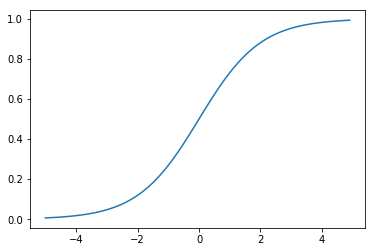

In [8]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.plot(x,y)
#plt.ylim(-0.1, 1.1)
plt.show()

시그모이드가 필요한 이유: 선형아닌 함수가 필요함(선형은 합성해봤자 선형임)

In [9]:
def relu(x):
    return np.maximum(0,x)

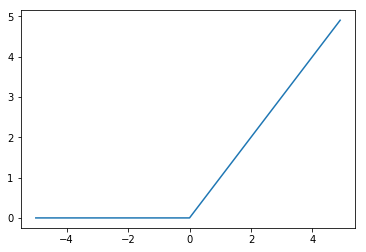

In [10]:
x = np.arange(-5, 5, 0.1)
y = relu(x)

plt.close()
plt.plot(x,y)
plt.show()

In [18]:
X = np.array([1,2]) # 입력
W = np.array([[1,3,5],[2,4,8]]) # 가중치
Y = np.dot(X,W) # 출력
print(Y)

[ 5 11 21]


각 레이어를, A = XW + B 로 표현 가능(행렬 생각)

In [21]:
X = np.array([1,0.5]) # input
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # weight(임의의 값임)
B1 = np.array([0.1,0.2,0.3]) # threshold

A1 = sigmoid(np.dot(X, W1) + B1) # second layer(함수적용)

In [22]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = sigmoid(np.dot(A1, W2) + B2)

In [24]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = sigmoid(np.dot(A2, W3) + B3)
print(A3)

[0.57855079 0.66736228]


In [27]:
def softmax_raw(a):
    import numpy as np
    
    exp_a = np.exp(a)
    sum_exp = np.sum(exp_a)
    
    return exp_a / sum_exp

overflow : 지수함수에서 inf가 발생하는 문제. 입력값 중 최댓값을 더해줌으로써 해결함

In [28]:
def softmax(a):
    import numpy as np
    
    fix = np.max(a)
    
    exp_a = np.exp(a-fix)
    sum_exp = np.sum(exp_a)
    
    return exp_a / sum_exp

In [29]:
ex = np.array([1010,1000,900])

In [30]:
softmax_raw(ex)

/Users/leeyungyu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp
/Users/leeyungyu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


array([nan, nan, nan])

보정하지 않을 경우 나눗셈 이전부터 오류나서 nan이 출력됨.

In [31]:
softmax(ex)

array([9.99954602e-01, 4.53978687e-05, 1.68883521e-48])

softmax의 값은 항상 0부터 1 사이고 총합은 1. 즉, 확률로 해석 가능

In [ ]:
ㄴ